# Import

In [1839]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import mytools as mt

In [2420]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
tt = pd.concat([train, test])

In [2422]:
train.shape, test.shape

((891, 12), (418, 11))

In [1841]:
train_original = pd.read_csv("train.csv")

# Describing the data

In [1842]:
mt.glance(train)

SHAPE:
(891, 12)

DESCRIPTION:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

DESCRIPTION OF OBJECT DATA TYPES:
               

In [1843]:
mt.glance(test)

SHAPE:
(418, 11)

DESCRIPTION:
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

DESCRIPTION OF OBJECT DATA TYPES:
                    Name   Sex    Ticket            Cabin Embarked
count                418   418       418               91      418
unique               418     2       363               76        3
top     Kelly, Mr. Jam

# Imputing missing values

## Extraction and Clean-up

needs further clean-up, get dummies and other modifications

In [1844]:
tt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Name

In [1845]:
tt['Title']=tt.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())

#### Titles

In [1846]:
tt.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [1847]:
tt.groupby(['Title', 'Sex']).Survived.mean()

Title         Sex   
Capt          male      0.000000
Col           male      0.500000
Don           male      0.000000
Dona          female         NaN
Dr            female    1.000000
              male      0.333333
Jonkheer      male      0.000000
Lady          female    1.000000
Major         male      0.500000
Master        male      0.575000
Miss          female    0.697802
Mlle          female    1.000000
Mme           female    1.000000
Mr            male      0.156673
Mrs           female    0.792000
Ms            female    1.000000
Rev           male      0.000000
Sir           male      1.000000
the Countess  female    1.000000
Name: Survived, dtype: float64

Group the Officers together, leave Dr and Rev as they seem to have separate rates of survival.

In [1848]:
newtitles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Nobility",
    "Don":        "Nobility",
    "Sir" :       "Nobility",
    "Dr":         "Dr",
    "Rev":        "Rev",
    "the Countess":"Nobility",
    "Dona":       "Nobility",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr":        "Mr",
    "Mrs":       "Mrs",
    "Miss":      "Miss",
    "Master":    "Master",
    "Lady":      "Nobility"
}

In [1849]:
tt['Title'] = tt.Title.map(newtitles).copy()

In [1850]:
tt.Title.value_counts()

Mr          757
Miss        262
Mrs         200
Master       61
Rev           8
Dr            8
Officer       7
Nobility      6
Name: Title, dtype: int64

In [1851]:
tt = tt.drop('Name', axis=1)

In [1852]:
title_analysis = tt.copy()

In [1853]:
tt = pd.get_dummies(tt, columns=['Title'], drop_first=True, prefix ='Title')

In [1854]:
tt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Nobility,Title_Officer,Title_Rev
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0,0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0,0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0,0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0,0


### Ticket

In [1855]:
tt['Dup_Ticket'] = tt.Ticket.duplicated()

In [1856]:
(tt.query('Dup_Ticket == True and Survived == 0.0').shape[0]/891) * 100

12.008978675645341

Duplicate Ticket is not a good predictor of Survived, with both around 10% rate for Survived and Not Survived.

In [1857]:
tt['Ticket_Length'] = tt.Ticket.apply(lambda x: len(x))

C:\Users\euana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ticket_Length'>

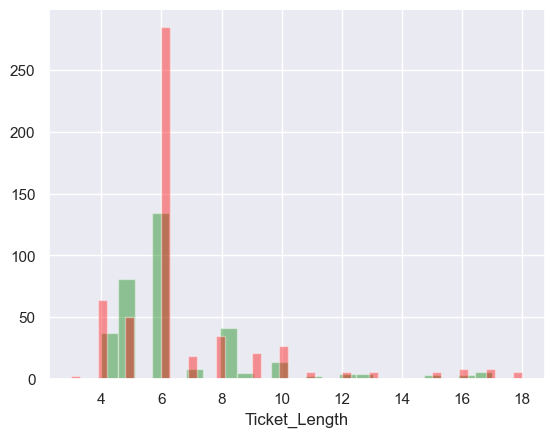

In [1858]:
sns.distplot(tt[tt.Survived==1].Ticket_Length, color='green', kde=False)
sns.distplot(tt[tt.Survived==0].Ticket_Length, color='red', kde=False)

In [1859]:
tt.iloc[0:891].corr()['Survived'].sort_values()

Title_Mr         -0.549199
Pclass           -0.338481
Age              -0.077221
Title_Rev        -0.064988
Ticket_Length    -0.055331
SibSp            -0.035322
PassengerId      -0.005007
Title_Officer     0.002496
Title_Nobility    0.033391
Parch             0.081629
Title_Master      0.085221
Dup_Ticket        0.121766
Fare              0.257307
Title_Miss        0.332795
Title_Mrs         0.344935
Survived          1.000000
Name: Survived, dtype: float64

In [1860]:
tt = tt.drop('Ticket', axis=1).copy()

In [1861]:
tt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Nobility', 'Title_Officer', 'Title_Rev',
       'Dup_Ticket', 'Ticket_Length'],
      dtype='object')

### Cabin

#### Duplicate Cabins

In [1862]:
tt['Dup_Cabin'] = tt.Cabin.duplicated()

In [1863]:
(tt.iloc[0:891].query('Dup_Cabin == True and Survived == 1').shape[0]/891) * 100

28.058361391694724

Duplicate Cabin is a good predictor of not surviving, with 55.33% in a duplicate cabin not surviving. 

In [1864]:
tt.isna().sum()

PassengerId          0
Survived           418
Pclass               0
Sex                  0
Age                263
SibSp                0
Parch                0
Fare                 1
Cabin             1014
Embarked             2
Title_Master         0
Title_Miss           0
Title_Mr             0
Title_Mrs            0
Title_Nobility       0
Title_Officer        0
Title_Rev            0
Dup_Ticket           0
Ticket_Length        0
Dup_Cabin            0
dtype: int64

#### Get cabin letter

In [1865]:
temp = []

In [1866]:
for x in tt.Cabin:
    if type(x) != float:
        temp.append(x[0])
    else:
        temp.append('None')

In [1867]:
tt['Cabin_Letter'] = temp

In [1868]:
tt_Cabin_Letter = tt.copy()

<AxesSubplot:xlabel='Cabin_Letter', ylabel='Survived'>

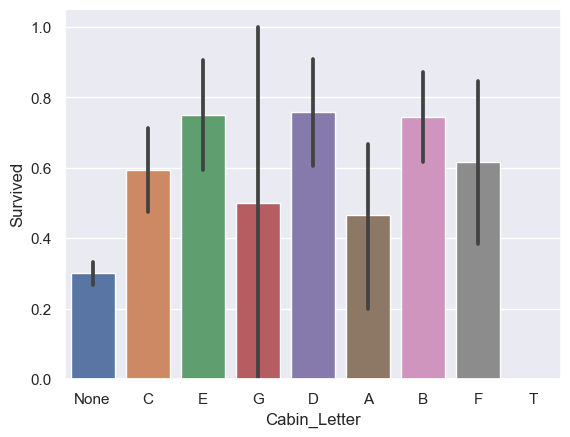

In [1869]:
sns.barplot(data=tt, x="Cabin_Letter", y="Survived")

In [1870]:
tt = tt.drop("Cabin", axis=1).copy()

In [1871]:
tt = pd.get_dummies(tt, columns=['Cabin_Letter'], drop_first=True, prefix ='Letter_')

## Sex

In [1872]:
tt['Male'] = pd.get_dummies(tt.Sex,drop_first=True)

In [1873]:
tt = tt.drop('Sex', axis=1)

In [1874]:
tt.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title_Master,Title_Miss,...,Dup_Cabin,Letter__B,Letter__C,Letter__D,Letter__E,Letter__F,Letter__G,Letter__None,Letter__T,Male
0,1,0.0,3,22.0,1,0,7.2500,S,0,0,...,False,0,0,0,0,0,0,1,0,1
1,2,1.0,1,38.0,1,0,71.2833,C,0,0,...,False,0,1,0,0,0,0,0,0,0
2,3,1.0,3,26.0,0,0,7.9250,S,0,1,...,True,0,0,0,0,0,0,1,0,0
3,4,1.0,1,35.0,1,0,53.1000,S,0,0,...,False,0,1,0,0,0,0,0,0,0
4,5,0.0,3,35.0,0,0,8.0500,S,0,0,...,True,0,0,0,0,0,0,1,0,1


### Embarked

In [1875]:
tt = pd.get_dummies(tt, columns=['Embarked'], drop_first=True, prefix ='Embarked_')

In [1876]:
tt.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,...,Letter__C,Letter__D,Letter__E,Letter__F,Letter__G,Letter__None,Letter__T,Male,Embarked__Q,Embarked__S
0,1,0.0,3,22.0,1,0,7.2500,0,0,1,...,0,0,0,0,0,1,0,1,0,1
1,2,1.0,1,38.0,1,0,71.2833,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,1.0,3,26.0,0,0,7.9250,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,4,1.0,1,35.0,1,0,53.1000,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,5,0.0,3,35.0,0,0,8.0500,0,0,1,...,0,0,0,0,0,1,0,1,0,1


In [1877]:
tt.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,...,Letter__C,Letter__D,Letter__E,Letter__F,Letter__G,Letter__None,Letter__T,Male,Embarked__Q,Embarked__S
413,1305,NaN,3,NaN,0,0,8.0500,0,0,1,...,0,0,0,0,0,1,0,1,0,1
414,1306,NaN,1,39.0,0,0,108.9000,0,0,0,...,1,0,0,0,0,0,0,0,0,0
415,1307,NaN,3,38.5,0,0,7.2500,0,0,1,...,0,0,0,0,0,1,0,1,0,1
416,1308,NaN,3,NaN,0,0,8.0500,0,0,1,...,0,0,0,0,0,1,0,1,0,1
417,1309,NaN,3,NaN,1,1,22.3583,1,0,0,...,0,0,0,0,0,1,0,1,0,0


## Using Miss Forest

In [1878]:
tt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Nobility',
       'Title_Officer', 'Title_Rev', 'Dup_Ticket', 'Ticket_Length',
       'Dup_Cabin', 'Letter__B', 'Letter__C', 'Letter__D', 'Letter__E',
       'Letter__F', 'Letter__G', 'Letter__None', 'Letter__T', 'Male',
       'Embarked__Q', 'Embarked__S'],
      dtype='object')

#### Split into train and test

In [1879]:
train = tt.iloc[0:891].copy()

In [1880]:
test = tt.iloc[891:1309].copy()

In [1881]:
imputation_train = train[[#'PassengerId', 
    'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Nobility', 'Title_Officer', 'Title_Rev', 'Dup_Ticket',
       'Ticket_Length', 'Dup_Cabin', 'Male', 'Letter__B', 'Letter__C',
       'Letter__D', 'Letter__E', 'Letter__F', 'Letter__G', 'Letter__None',
       'Letter__T', 'Embarked__Q', 'Embarked__S']].copy()

In [1882]:
imputation_test = test[[#'PassengerId', #'Survived', 
    'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Nobility', 'Title_Officer', 'Title_Rev', 'Dup_Ticket',
       'Ticket_Length', 'Dup_Cabin', 'Male', 'Letter__B', 'Letter__C',
       'Letter__D', 'Letter__E', 'Letter__F', 'Letter__G', 'Letter__None',
       'Letter__T', 'Embarked__Q', 'Embarked__S']].copy()

#### Imputing train 

In [1883]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

In [1884]:
imputer = MissForest()
mf_train = imputer.fit_transform(imputation_train)
mf_train = pd.DataFrame(mf_train, columns = imputation_train.columns)

C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 0


C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 1


C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 2


C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 3


In [1885]:
mf_train.isna().sum()

Survived          0
Pclass            0
Age               0
SibSp             0
Parch             0
Fare              0
Title_Master      0
Title_Miss        0
Title_Mr          0
Title_Mrs         0
Title_Nobility    0
Title_Officer     0
Title_Rev         0
Dup_Ticket        0
Ticket_Length     0
Dup_Cabin         0
Male              0
Letter__B         0
Letter__C         0
Letter__D         0
Letter__E         0
Letter__F         0
Letter__G         0
Letter__None      0
Letter__T         0
Embarked__Q       0
Embarked__S       0
dtype: int64

#### Imputing test

In [2199]:
imputer = MissForest()
mf_test = imputer.fit_transform(imputation_test)
mf_test = pd.DataFrame(mf_test, columns = imputation_test.columns)

C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 0


C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 1


C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 2


In [1887]:
mf_test.isna().sum()

Pclass            0
Age               0
SibSp             0
Parch             0
Fare              0
Title_Master      0
Title_Miss        0
Title_Mr          0
Title_Mrs         0
Title_Nobility    0
Title_Officer     0
Title_Rev         0
Dup_Ticket        0
Ticket_Length     0
Dup_Cabin         0
Male              0
Letter__B         0
Letter__C         0
Letter__D         0
Letter__E         0
Letter__F         0
Letter__G         0
Letter__None      0
Letter__T         0
Embarked__Q       0
Embarked__S       0
dtype: int64

#### Re-joining train and test

In [1888]:
mf_train['PassengerId'] = train['PassengerId']

In [1889]:
mf_test['PassengerId'] = test['PassengerId']

# Exploring the relationship between Survived and other Features

In [1890]:
survived = round((mf_train.query('Survived == 1').shape[0]/mf_train.shape[0])*100,1)

In [1891]:
death = 100 - survived

In [1892]:
print(f"{survived}% survived, and {death}% did not survive.")

38.4% survived, and 61.6% did not survive.


## Pclass

In [1893]:
Pclass_totals = mf_train.Pclass.value_counts()

In [1894]:
Pclass_totals

3.0    491
1.0    216
2.0    184
Name: Pclass, dtype: int64

In [1895]:
Pclass_percentage = mf_train.Pclass.value_counts(normalize=True).round(2)

In [1896]:
Pclass_totals

3.0    491
1.0    216
2.0    184
Name: Pclass, dtype: int64

In [1897]:
Pclass_percentage

3.0    0.55
1.0    0.24
2.0    0.21
Name: Pclass, dtype: float64

In [1898]:
Pclass_survived = train.groupby('Pclass').Survived.value_counts()

<AxesSubplot:xlabel='Survived'>

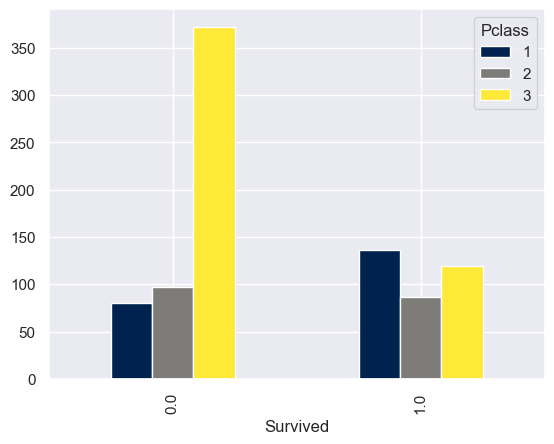

In [1899]:
Pclass_survived.unstack(level=0).plot(kind='bar', subplots=False, colormap="cividis")

In [1900]:
Pclass_survived_normalized = train.groupby('Pclass').Survived.value_counts(normalize=True)

<AxesSubplot:xlabel='Survived'>

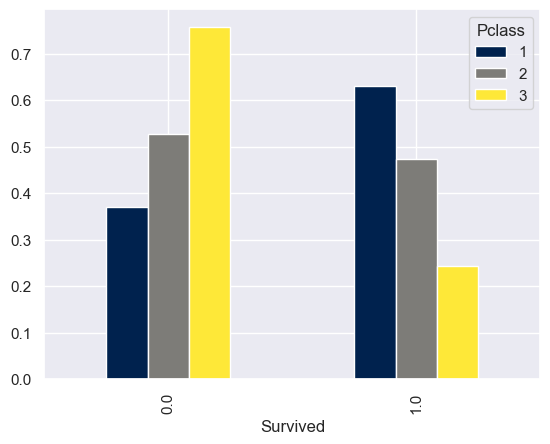

In [1901]:
Pclass_survived_normalized.unstack(level=0).plot(kind='bar', subplots=False, colormap="cividis")

In [1902]:
Pclass_survived_combined = pd.concat([Pclass_survived,
                                      Pclass_survived_normalized],
                                      axis=1,
                                      keys=('Proportion', 'Count', 'Percentage')).round(2)


In [1903]:
Pclass_survived_combined

Proportion  Count
Pclass Survived                   
1      1.0              136   0.63
       0.0               80   0.37
2      0.0               97   0.53
       1.0               87   0.47
3      0.0              372   0.76
       1.0              119   0.24

In [1904]:
Pclass_mean_survived = mf_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

In [1905]:
Pclass_mean_survived

,Pclass,Survived
0,1.0,0.629630
1,2.0,0.472826
2,3.0,0.242363


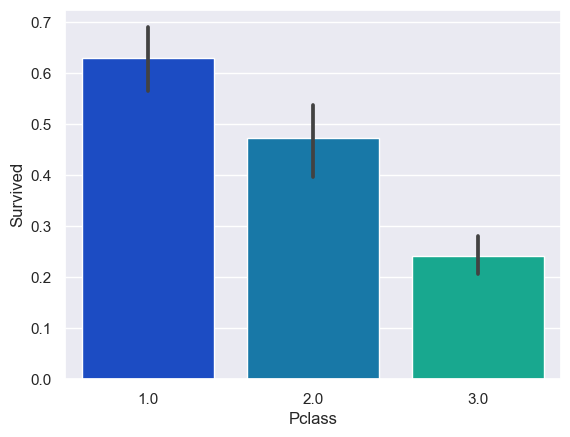

In [1906]:
ax = sns.barplot(data=mf_train, x="Pclass", y="Survived", palette="winter")

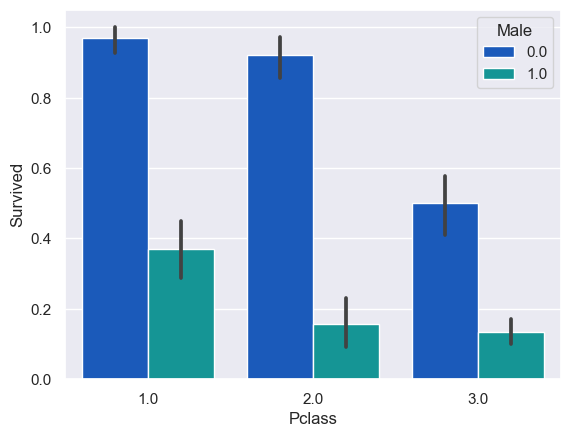

In [1907]:
ax = sns.barplot(data=mf_train, x="Pclass", y="Survived", hue="Male", palette="winter")

NOTES: The lower Pclass number (higher class) the better the chance of survival. Pclass 3 accounts for 55% of all passengers in the mf_train dataset but has Survived at 24%, compared to Pclass 1 which accounts for 24.3% of all passenger with Survived at 62.96%. 

# Sex

In [1908]:
Sex_totals = mf_train.Male.value_counts()

In [1909]:
Sex_percentage = mf_train.Male.value_counts(normalize=True).round(2)

In [1910]:
Sex_totals, Sex_percentage

(1.0    577
 0.0    314
 Name: Male, dtype: int64,
 1.0    0.65
 0.0    0.35
 Name: Male, dtype: float64)

In [1911]:
Sex_survived = mf_train.groupby('Male').Survived.value_counts()

In [1912]:
Sex_survived_normalized = mf_train.groupby('Male').Survived.value_counts(normalize=True).round(2)

In [1913]:
Sex_survived, Sex_survived_normalized

(Male  Survived
 0.0   1.0         233
       0.0          81
 1.0   0.0         468
       1.0         109
 Name: Survived, dtype: int64,
 Male  Survived
 0.0   1.0         0.74
       0.0         0.26
 1.0   0.0         0.81
       1.0         0.19
 Name: Survived, dtype: float64)

<AxesSubplot:xlabel='Survived'>

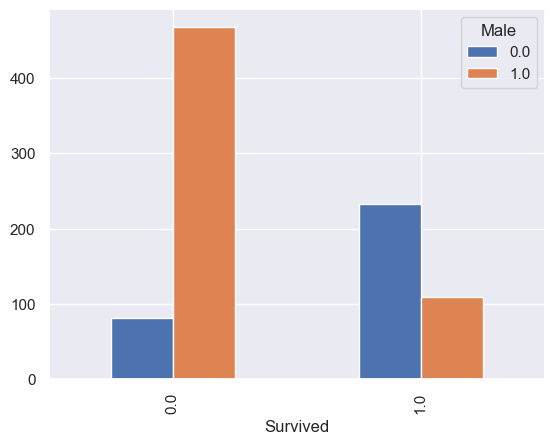

In [1914]:
Sex_survived.unstack(level=0).plot(kind='bar', subplots=False)

<AxesSubplot:xlabel='Survived'>

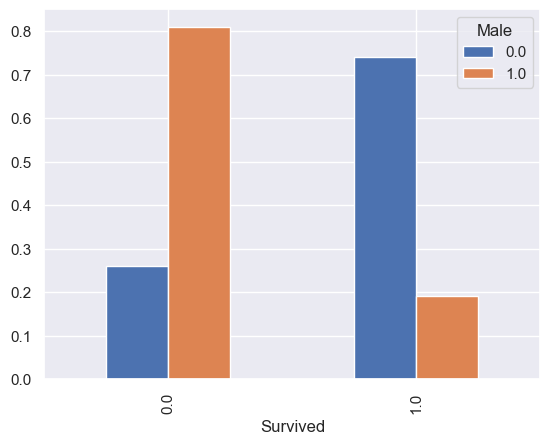

In [1915]:
Sex_survived_normalized.unstack(level=0).plot(kind='bar', subplots=False)

In [1916]:
Sex_survived_combined = pd.concat([Sex_survived,
                 Sex_survived_normalized],
                 axis=1,
                 keys=('Proportion', 'Count', 'Percentage')).round(2)


In [1917]:
Sex_survived_combined

Proportion  Count
Male Survived                   
0.0  1.0              233   0.74
     0.0               81   0.26
1.0  0.0              468   0.81
     1.0              109   0.19

NOTES: Female has 74% survival rate, compared to Male 19%. Of the 891 passengers in our data, 65% were men and 35% were men.

## Age

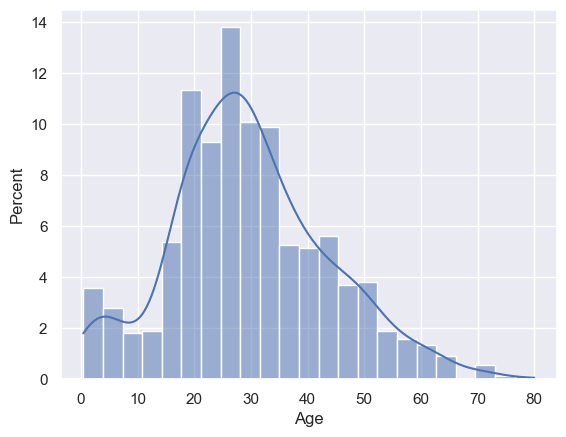

In [1918]:
ax = sns.histplot(data=mf_train, x="Age", stat="percent", kde=True)

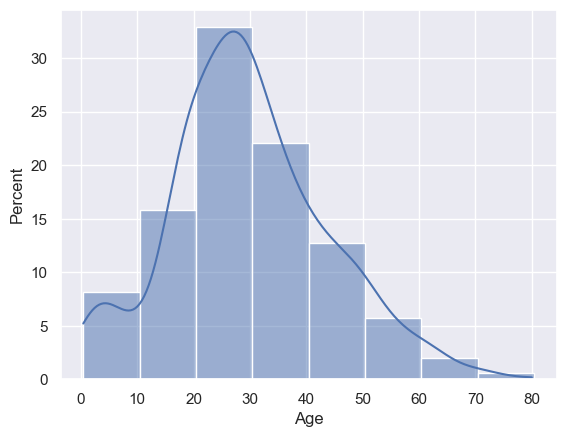

In [1919]:
ax = sns.histplot(data=mf_train, x="Age", stat="percent", binwidth=10, kde=True)

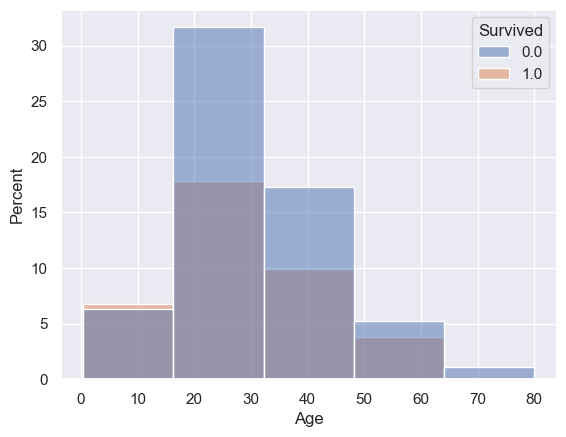

In [1920]:
ax = sns.histplot(data=mf_train, x="Age", stat="percent", bins=5, hue="Survived")

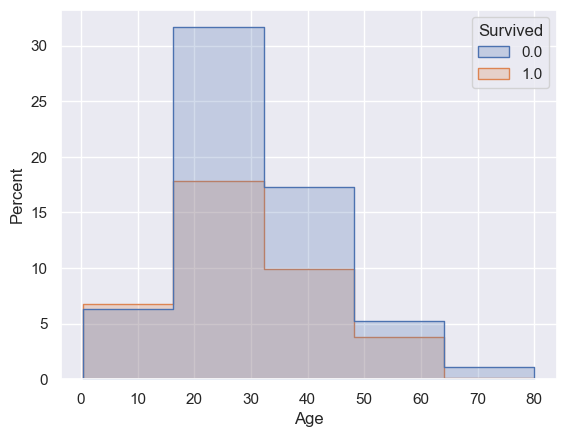

In [1921]:
ax = sns.histplot(data=mf_train, x="Age", stat="percent", element="step", bins=5, hue="Survived")

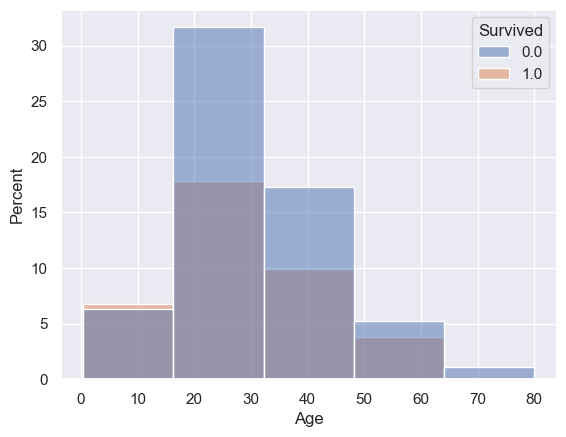

In [1922]:
ax = sns.histplot(data=mf_train, x="Age", stat="percent", hue="Survived", bins=5)

NOTES: Age closely resembles a gaussian distribution, with a long right-tail. Over 50% are passengers are under the age of 30. Speaking to Age's relationship with survival, only under 16's chance of surviving was greater than that of not surviving. At the other under of the distribution, over 64's chance of surviving was very slim.

## SibSp

In [1923]:
mf_train.query('SibSp > 0 ').shape[0]

283

In [1924]:
mf_train.SibSp.value_counts()

0.0    608
1.0    209
2.0     28
4.0     18
3.0     16
8.0      7
5.0      5
Name: SibSp, dtype: int64

In [1925]:
mf_train.query('SibSp == 8')

,Survived,Pclass,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Letter__C,Letter__D,Letter__E,Letter__F,Letter__G,Letter__None,Letter__T,Embarked__Q,Embarked__S,PassengerId
159,0.0,3.0,9.329333,8.0,2.0,69.55,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,160
180,0.0,3.0,15.986556,8.0,2.0,69.55,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,181
201,0.0,3.0,16.854667,8.0,2.0,69.55,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,202
324,0.0,3.0,16.854667,8.0,2.0,69.55,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,325
792,0.0,3.0,15.986556,8.0,2.0,69.55,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,793
846,0.0,3.0,16.854667,8.0,2.0,69.55,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,847
863,0.0,3.0,15.986556,8.0,2.0,69.55,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,864


NB: The number of SibSp does not mean all are listed in the train dataset.

In [1926]:
SibSp_survived = mf_train.groupby('SibSp').Survived.value_counts().round(2)

In [1927]:
SibSp_survived_normalized = mf_train.groupby('SibSp').Survived.value_counts(normalize=True).round(2)

In [1928]:
SibSp_survived_combined = pd.concat([SibSp_survived,
                 SibSp_survived_normalized],
                 axis=1,
                 keys=('Count', 'Percentage')).round(2)


In [1929]:
SibSp_survived_combined

Count  Percentage
SibSp Survived                   
0.0   0.0         398        0.65
      1.0         210        0.35
1.0   1.0         112        0.54
      0.0          97        0.46
2.0   0.0          15        0.54
      1.0          13        0.46
3.0   0.0          12        0.75
      1.0           4        0.25
4.0   0.0          15        0.83
      1.0           3        0.17
5.0   0.0           5        1.00
8.0   0.0           7        1.00

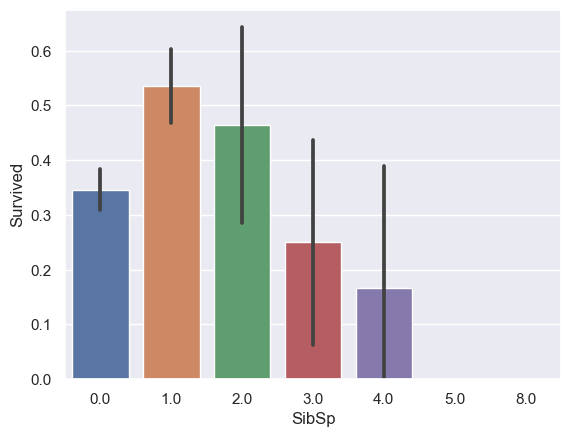

In [1930]:
ax = sns.barplot(data=mf_train, x="SibSp", y="Survived")

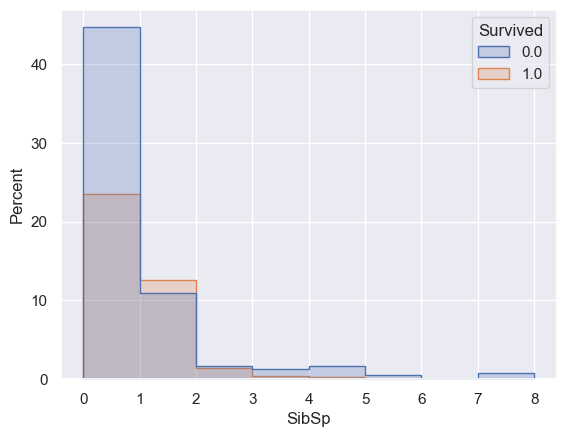

In [1931]:
ax = sns.histplot(data=mf_train, x="SibSp", stat="percent", element="step", bins=8, hue="Survived")

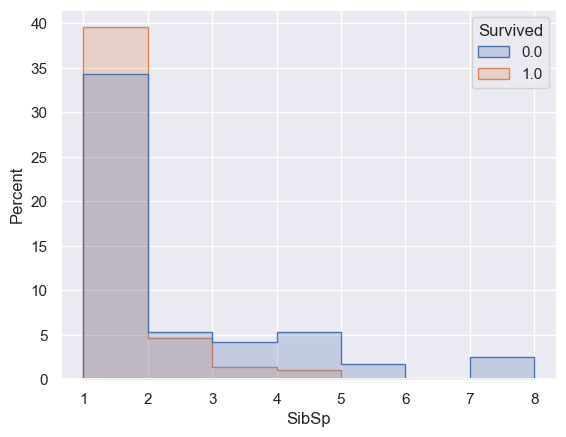

In [1932]:
ax = sns.histplot(data=mf_train.query('SibSp > 0'), x="SibSp", stat="percent", element="step", bins=7, hue="Survived")

NOTES: Of 891 passengers, 283 have SibSp. Having 1 or 2 SibSp increase chance of survival of above average, compared to any other value which has a below average chance of survival. I imagine that this is accounted for by married couples or small families. Having 3 or more siblings dramatically decreases chances of survival. 

## Parch

In [1933]:
mf_train.query('Parch > 0 ').shape[0]

213

In [1934]:
mf_train.Parch.value_counts()

0.0    678
1.0    118
2.0     80
5.0      5
3.0      5
4.0      4
6.0      1
Name: Parch, dtype: int64

In [1935]:
Parch_survived = mf_train.groupby('Parch').Survived.value_counts()

In [1936]:
Parch_survived

Parch  Survived
0.0    0.0         445
       1.0         233
1.0    1.0          65
       0.0          53
2.0    0.0          40
       1.0          40
3.0    1.0           3
       0.0           2
4.0    0.0           4
5.0    0.0           4
       1.0           1
6.0    0.0           1
Name: Survived, dtype: int64

In [1937]:
Parch_survived_normalized = mf_train.groupby('Parch').Survived.value_counts(normalize=True)

In [1938]:
Parch_survived_normalized

Parch  Survived
0.0    0.0         0.656342
       1.0         0.343658
1.0    1.0         0.550847
       0.0         0.449153
2.0    0.0         0.500000
       1.0         0.500000
3.0    1.0         0.600000
       0.0         0.400000
4.0    0.0         1.000000
5.0    0.0         0.800000
       1.0         0.200000
6.0    0.0         1.000000
Name: Survived, dtype: float64

In [1939]:
Parch_survived_combined = pd.concat([Parch_survived,
                 Parch_survived_normalized],
                 axis=1,
                 keys=('Count', 'Percentage')).round(2)

In [1940]:
Parch_survived_combined

Count  Percentage
Parch Survived                   
0.0   0.0         445        0.66
      1.0         233        0.34
1.0   1.0          65        0.55
      0.0          53        0.45
2.0   0.0          40        0.50
      1.0          40        0.50
3.0   1.0           3        0.60
      0.0           2        0.40
4.0   0.0           4        1.00
5.0   0.0           4        0.80
      1.0           1        0.20
6.0   0.0           1        1.00

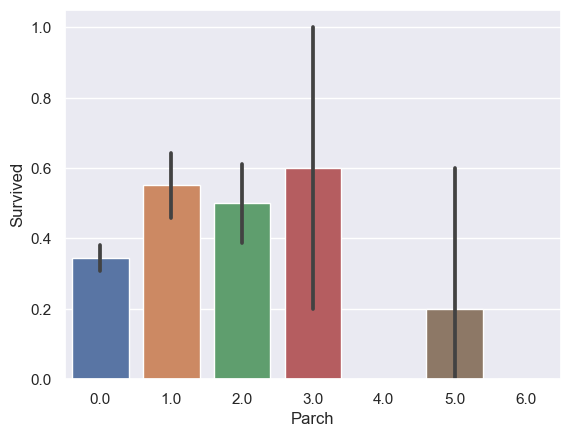

In [1941]:
ax = sns.barplot(data=mf_train, x="Parch", y="Survived")

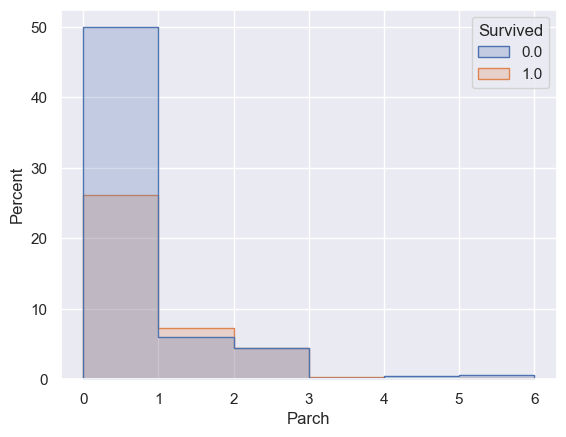

In [1942]:
ax = sns.histplot(data=mf_train, x="Parch", stat="percent", element="step", bins=6, hue="Survived")

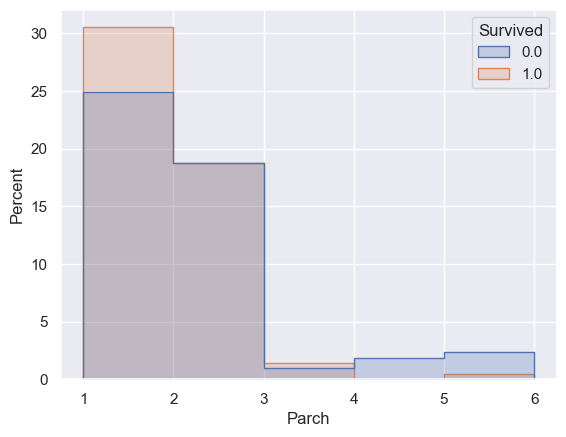

In [1943]:
ax = sns.histplot(data=mf_train.query('Parch > 0'), x="Parch", stat="percent", element="step", bins=5, hue="Survived")

NOTES: Nearly 300 passengers, or 1/3 of the data, have Parch relations. Having 1, 2 or 3 Parch relation increase chance of survival of above average, compared to any other value which has a below average chance of survival. Greater than 3 Parch relationships greatly decreases chance of survival, where as having none means a little below average chance of survival.

## Fare

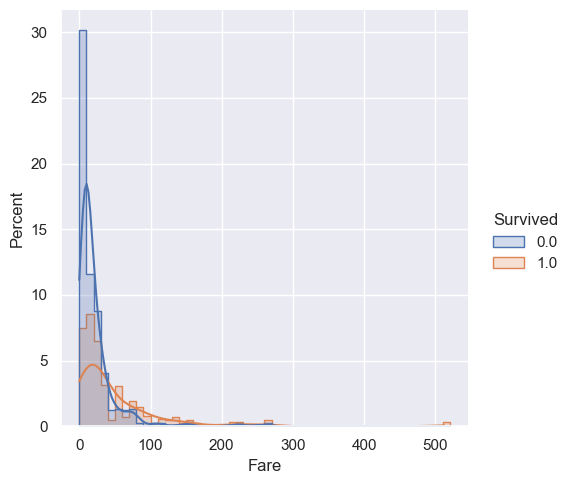

In [1944]:
ax = sns.displot(data=mf_train, x="Fare", hue="Survived", kde=True, binwidth=10, stat="percent", element="step")

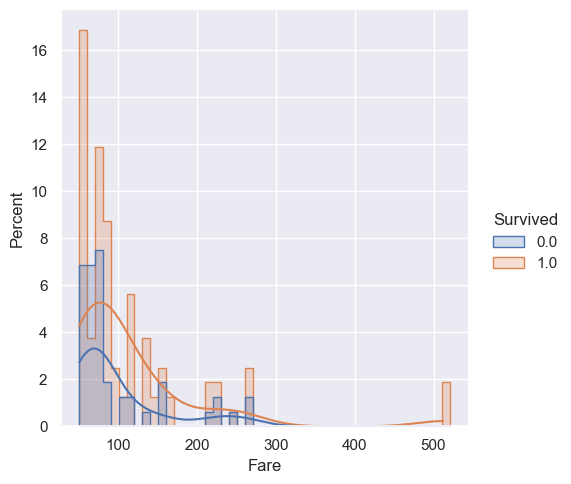

In [1945]:
ax = sns.displot(data=mf_train.query('Fare>50'), x="Fare", hue="Survived", kde=True, binwidth=10, stat="percent", element="step")

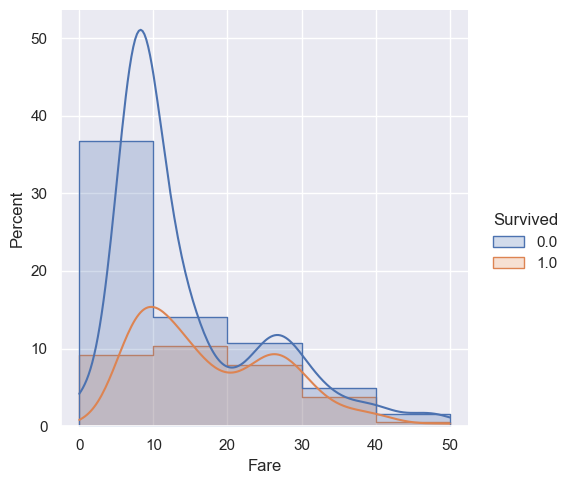

In [1946]:
ax = sns.displot(data=mf_train.query('Fare<=50'), x="Fare", hue="Survived", kde=True, binwidth=10, stat="percent", element="step")

In [1947]:
mf_train.query('Fare <= 50').shape[0]

731

In [1948]:
mf_train.query('Fare > 50').shape[0]

160

NOTES: Fare under 50 accounted for 82% of passengers, and Fare over 50 accounted for the remaining 18%. All Fare under 50 had a greater chance of not survived than survived, with those under 10 accounting for over 1/3 of those who did not survive. Whereas Fare greater than 50 had a greater chance of survival than not survived.

## Title

NB: WILL NEED TO CREATE TITLE DUMMIES FOR MODEL, COMMENTED OUT THE CODE FOR ANALYSIS. MAY NOT NEED TO, MF_TRAIN SEPARATE FROM TT DATAFRAME.

In [1949]:
Title_count = title_analysis.groupby('Title').Survived.value_counts()

In [1950]:
Title_percentage = title_analysis.groupby('Title').Survived.value_counts(normalize=True).round(2)

In [1951]:
Title_survived_combined = pd.concat([Title_count,
                 Title_percentage],
                 axis=1,
                 keys=('Count', 'Percentage')).round(2)
Title_survived_combined

Count  Percentage
Title    Survived                   
Dr       0.0           4        0.57
         1.0           3        0.43
Master   1.0          23        0.57
         0.0          17        0.42
Miss     1.0         129        0.70
         0.0          55        0.30
Mr       0.0         436        0.84
         1.0          81        0.16
Mrs      1.0         101        0.80
         0.0          26        0.20
Nobility 1.0           3        0.60
         0.0           2        0.40
Officer  0.0           3        0.60
         1.0           2        0.40
Rev      0.0           6        1.00

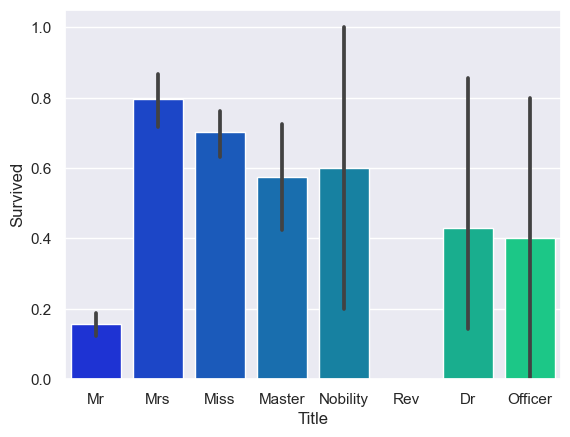

In [1952]:
ax = sns.barplot(data=title_analysis, x="Title", y="Survived", palette="winter")

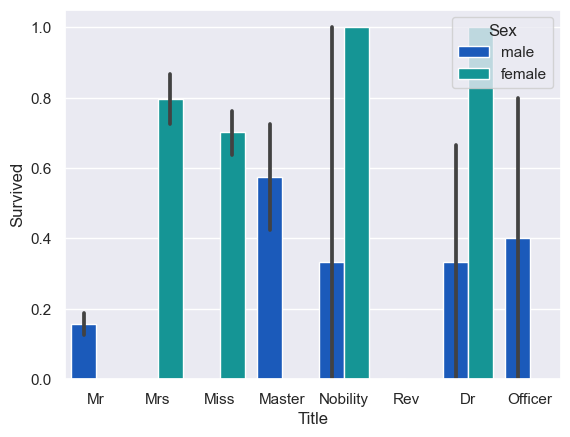

In [1953]:
ax = sns.barplot(data=title_analysis, x="Title", y="Survived", hue="Sex", palette="winter")

NOTES: Those with special titles like Nobility, Officer, Rev, Dr account for a very small proportion of the data. All excepting Rev have a higher than average survival rate, whereas all Rev did not survive. By Title, Mrs and Miss respectively had 80% and 70% chance of survival respectively. For Master, which account for 40 passengers likely young men, the survival rate is 57%. Mr, adult men, had a low 16% survival rate. Across all titles, where present Female had a greater survival rate than Male. Need to investigate the relation between Age, Sex and Survival further.

## Ticket

In [1954]:
mf_train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Nobility',
       'Title_Officer', 'Title_Rev', 'Dup_Ticket', 'Ticket_Length',
       'Dup_Cabin', 'Male', 'Letter__B', 'Letter__C', 'Letter__D', 'Letter__E',
       'Letter__F', 'Letter__G', 'Letter__None', 'Letter__T', 'Embarked__Q',
       'Embarked__S', 'PassengerId'],
      dtype='object')

### Duplicate Ticket

In [1955]:
DupTick_count = mf_train.groupby('Dup_Ticket').Survived.value_counts()

In [1956]:
DupTick_percentage = mf_train.groupby('Dup_Ticket').Survived.value_counts(normalize=True).round(2)

In [1957]:
DupTick_survived_combined = pd.concat([DupTick_count,
                 DupTick_percentage],
                 axis=1,
                 keys=('Count', 'Percentage')).round(2)
DupTick_survived_combined

Count  Percentage
Dup_Ticket Survived                   
0.0        0.0         442        0.65
           1.0         239        0.35
1.0        0.0         107        0.51
           1.0         103        0.49

NOTES: Those with a duplicate Ticket had a 49% chance of survival, whereas those without a duplicate ticket had a below average 35% chance of survival.

### Ticket Length

Count and Percentage tables were not useful because of the number of subdivisons of the data.

In [1958]:
LenTick_count = mf_train.groupby('Ticket_Length').Survived.value_counts()

In [1959]:
LenTick_count

Ticket_Length  Survived
3.0            0.0           2
4.0            0.0          64
               1.0          37
5.0            1.0          81
               0.0          50
6.0            0.0         285
               1.0         134
7.0            0.0          19
               1.0           8
8.0            1.0          41
               0.0          35
9.0            0.0          21
               1.0           5
10.0           0.0          27
               1.0          14
11.0           0.0           6
               1.0           2
12.0           0.0           6
               1.0           4
13.0           0.0           6
               1.0           4
15.0           0.0           6
               1.0           3
16.0           0.0           8
               1.0           3
17.0           0.0           8
               1.0           6
18.0           0.0           6
Name: Survived, dtype: int64

In [1960]:
LenTick_percentage = mf_train.groupby('Ticket_Length').Survived.value_counts(normalize=True).round(2)

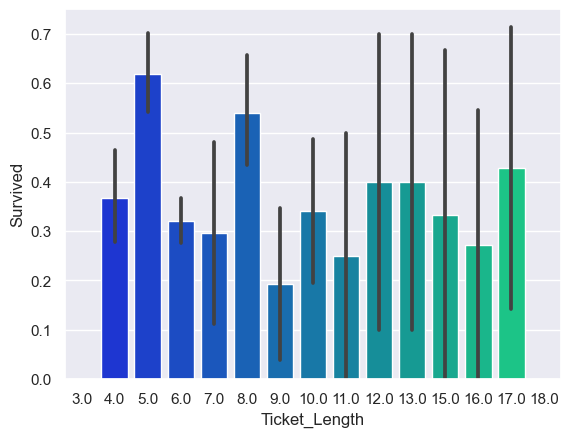

In [1961]:
ax = sns.barplot(data=mf_train, x="Ticket_Length", y="Survived", palette="winter")

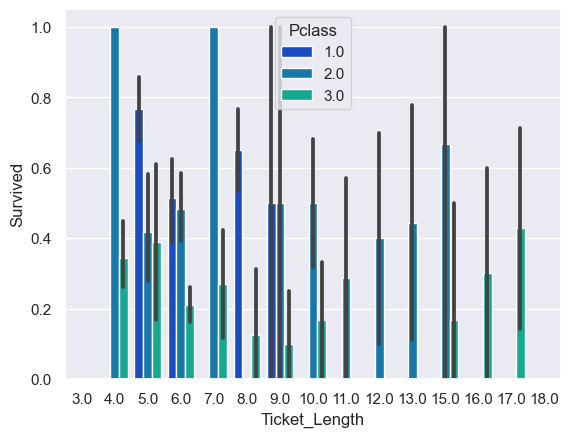

In [1962]:
ax = sns.barplot(data=mf_train, x="Ticket_Length", y="Survived", hue="Pclass", palette="winter")

NOTES: Ticket_Length 4 through 10 account for a significant number of passengers. For Pclass 2, a Ticket_Length of 4 or 7 meant 10% chance of survival. Ticket_Length had the greatest chance of survival at over 60% which is account for by the high proportion of Pclass 1 passengers. In Pclass 3, where survival was 24%, having a Ticket_Length of 4, 5, 6, 16 or 17 increased chances of survival.

## Cabin

### Duplicate Cabin

In [1963]:
DupCab_count = mf_train.groupby('Dup_Cabin').Survived.value_counts()
DupCab_count

Dup_Cabin  Survived
0.0        1.0          92
           0.0          56
1.0        0.0         493
           1.0         250
Name: Survived, dtype: int64

In [1964]:
DupCab_percentage = mf_train.groupby('Dup_Cabin').Survived.value_counts(normalize=True).round(2)
DupCab_percentage

Dup_Cabin  Survived
0.0        1.0         0.62
           0.0         0.38
1.0        0.0         0.66
           1.0         0.34
Name: Survived, dtype: float64

In [1965]:
mf_train.groupby('Dup_Cabin').Parch.value_counts()

Dup_Cabin  Parch
0.0        0.0      109
           1.0       25
           2.0       14
1.0        0.0      569
           1.0       93
           2.0       66
           3.0        5
           5.0        5
           4.0        4
           6.0        1
Name: Parch, dtype: int64

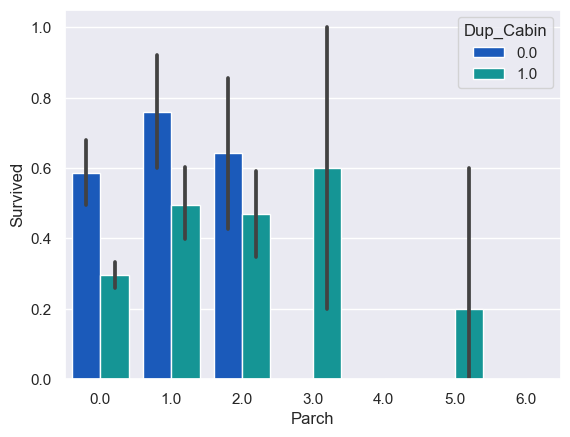

In [1966]:
ax =  sns.barplot(data=mf_train, x="Parch", y="Survived", hue="Dup_Cabin", palette="winter")

In [1967]:
mf_train.groupby('Dup_Cabin').SibSp.value_counts()

Dup_Cabin  SibSp
0.0        0.0      101
           1.0       42
           2.0        4
           3.0        1
1.0        0.0      507
           1.0      167
           2.0       24
           4.0       18
           3.0       15
           8.0        7
           5.0        5
Name: SibSp, dtype: int64

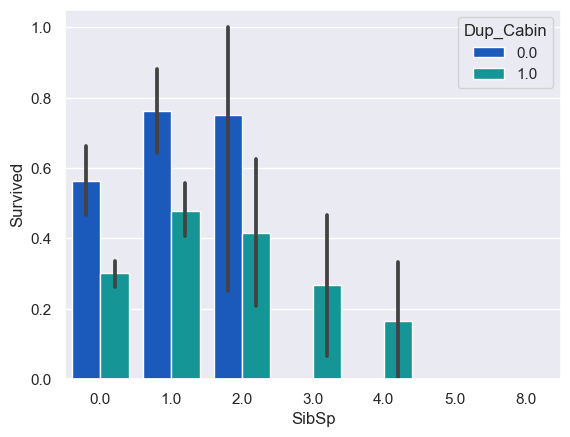

In [1968]:
ax =  sns.barplot(data=mf_train, x="SibSp", y="Survived", hue="Dup_Cabin", palette="winter")

In [1969]:
mf_train.groupby('Dup_Cabin').Pclass.value_counts()

Dup_Cabin  Pclass
0.0        1.0       133
           3.0         8
           2.0         7
1.0        3.0       483
           2.0       177
           1.0        83
Name: Pclass, dtype: int64

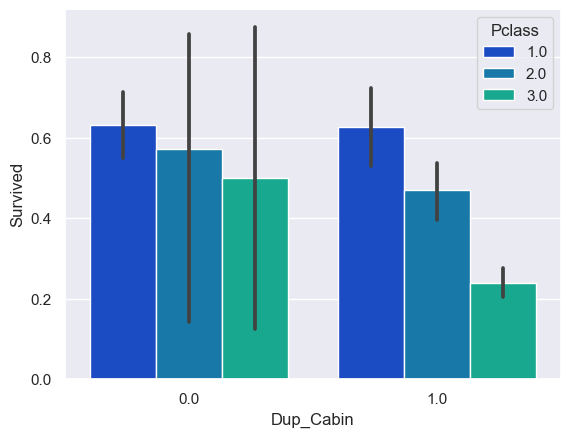

In [1970]:
ax =  sns.barplot(data=mf_train, x="Dup_Cabin", y="Survived", hue="Pclass", palette="winter")

NOTES: Only 148 of the 891 passengers did not have a Duplicate Cabin. Duplicate cabin survival was 34% compared to non-duplicates' 62%. Duplicate Cabin can indicate a Parch or SibSp relation but in most cases for Duplicate Cabin there is no relation. 82% of Duplicate Cabin were in Pclass 3 explaining the low overall rate of Duplicate Cabin survival. However, those in Pclass 3 who did not share a cabin had around a 45% chance of survival. For those in Pclass 1 a duplicate cabin or not did not affect survival. For those in Pclass2 a Duplicate Cabin lowered survival rate from near 60% to around 45%.

### Cabin Letter

<AxesSubplot:xlabel='Cabin_Letter', ylabel='Survived'>

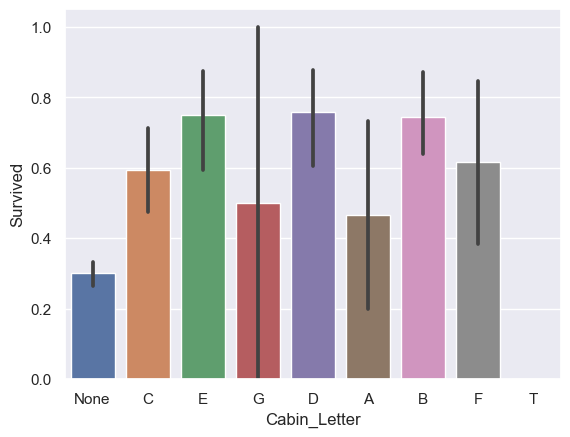

In [1971]:
sns.barplot(data=tt_Cabin_Letter, x="Cabin_Letter", y="Survived")

In [1972]:
tt_Cabin_Letter.groupby('Cabin_Letter').Survived.value_counts()

Cabin_Letter  Survived
A             0.0           8
              1.0           7
B             1.0          35
              0.0          12
C             1.0          35
              0.0          24
D             1.0          25
              0.0           8
E             1.0          24
              0.0           8
F             1.0           8
              0.0           5
G             0.0           2
              1.0           2
None          0.0         481
              1.0         206
T             0.0           1
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Cabin_Letter', ylabel='Survived'>

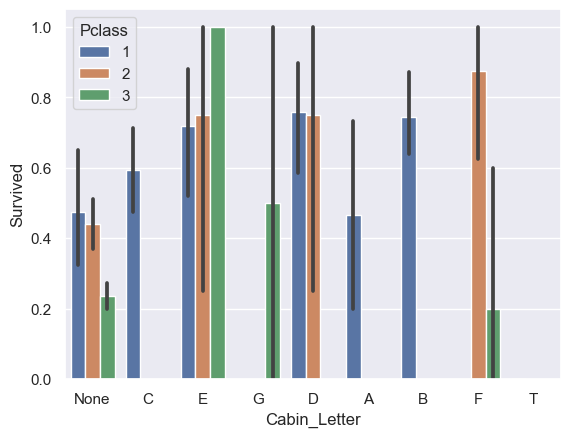

In [1973]:
sns.barplot(data=tt_Cabin_Letter, x="Cabin_Letter", y="Survived", hue="Pclass")

In [1974]:
tt_Cabin_Letter.groupby('Cabin_Letter').Pclass.value_counts()

Cabin_Letter  Pclass
A             1          22
B             1          65
C             1          94
D             1          40
              2           6
E             1          34
              2           4
              3           3
F             2          13
              3           8
G             3           5
None          3         693
              2         254
              1          67
T             1           1
Name: Pclass, dtype: int64

NOTES: 687, or 77%, passengers did not have a cabin letter. Having a Cabin Letter meant an above average chance of survival, compared to not having one which meant a below average chance of survival. Most with a Cabin Letter were in Pclass 1. Being in Pclass 3 with letters E and G greatly increased the chances of survival compared to the 24% average for that Pclass. For Class 3 with Cabin Letter all 3 passengers survived.

## Embarked

In [1975]:
train_original.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [1976]:
train_original.groupby('Embarked').Survived.value_counts(normalize=True).round(2)

Embarked  Survived
C         1           0.55
          0           0.45
Q         0           0.61
          1           0.39
S         0           0.66
          1           0.34
Name: Survived, dtype: float64

In [1977]:
train_original.groupby('Pclass').Embarked.value_counts(normalize=True).round(2)

Pclass  Embarked
1       S           0.59
        C           0.40
        Q           0.01
2       S           0.89
        C           0.09
        Q           0.02
3       S           0.72
        Q           0.15
        C           0.13
Name: Embarked, dtype: float64

In [1978]:
train_original.groupby('Embarked').Pclass.value_counts(normalize=True).round(2)

Embarked  Pclass
C         1         0.51
          3         0.39
          2         0.10
Q         3         0.94
          2         0.04
          1         0.03
S         3         0.55
          2         0.25
          1         0.20
Name: Pclass, dtype: float64

In [1979]:
train_original.query('Sex == "female" and Embarked == "Q"').shape[0]/train_original.query('Embarked == "Q"').shape[0]

0.4675324675324675

In [1980]:
train_original.query('Sex == "female" and Embarked == "S"').shape[0]/train_original.query('Embarked == "S"').shape[0]

0.31521739130434784

NOTES: Most passengers embarked at Southampton, then Cherbourg then Queenstown. 55% of those who embarked at Cherbourg survived, accounted for by over 50% being Pclass 1, whereas those from Southampton and Queenstown had 34% and 39% survival rates respectively. Of those who embarked at Queenstown, 94% were Pclass 3 and of those who embarked at Southampton 55% were Pclass 3. As seen in the above query, Queenstown survival rate being higher than Southampton can be accounted for by the high proportion of women. Nearly all of the Queenstown survivors were women in Pclass 3.

# Examining >1 features and their relation to Survival

## Pclass and Sex vs. Survival

In [1981]:
tab = pd.crosstab(mf_train['Pclass'],mf_train['Male'])
tab

Male,0.0,1.0
Pclass,,
1.0,94,122
2.0,76,108
3.0,144,347


Text(0, 0.5, 'Percentage')

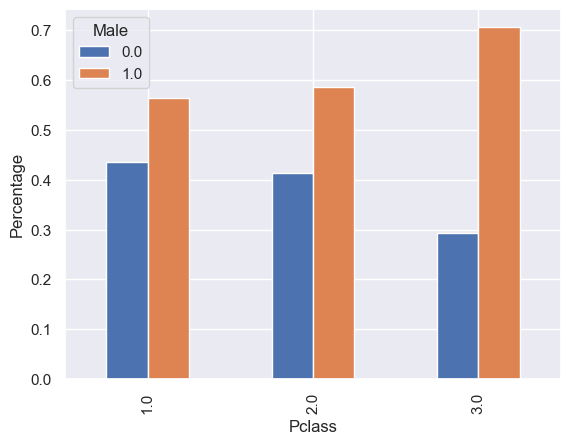

In [1982]:
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

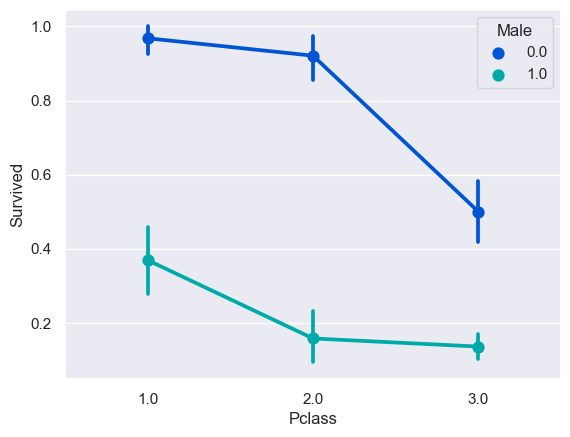

In [1983]:
sns.pointplot(data=mf_train, x="Pclass", y="Survived", hue="Male", palette="winter")

NOTES: In Pclass 3 women account for only 30% of the passengers, whereas 2 and 3 are 38% and 45% respectively. Overall, the survival decreases as Pclass increases. For women in Pclass 1 and 2, Survived sits above 90% but for women in Pclass 3 this slips to around 50%. Below the 74% average for femaales. For men, only those in Pclass 1 were above the 19% average for male survival. The difference between female survival in Pclass 1 vs. 2 is less than the difference between male survival in Pclass 1 vs. 2 where Survived drops by half from about 38% to 19%. 

## Pclass, Sex & Embarked vs. Survival

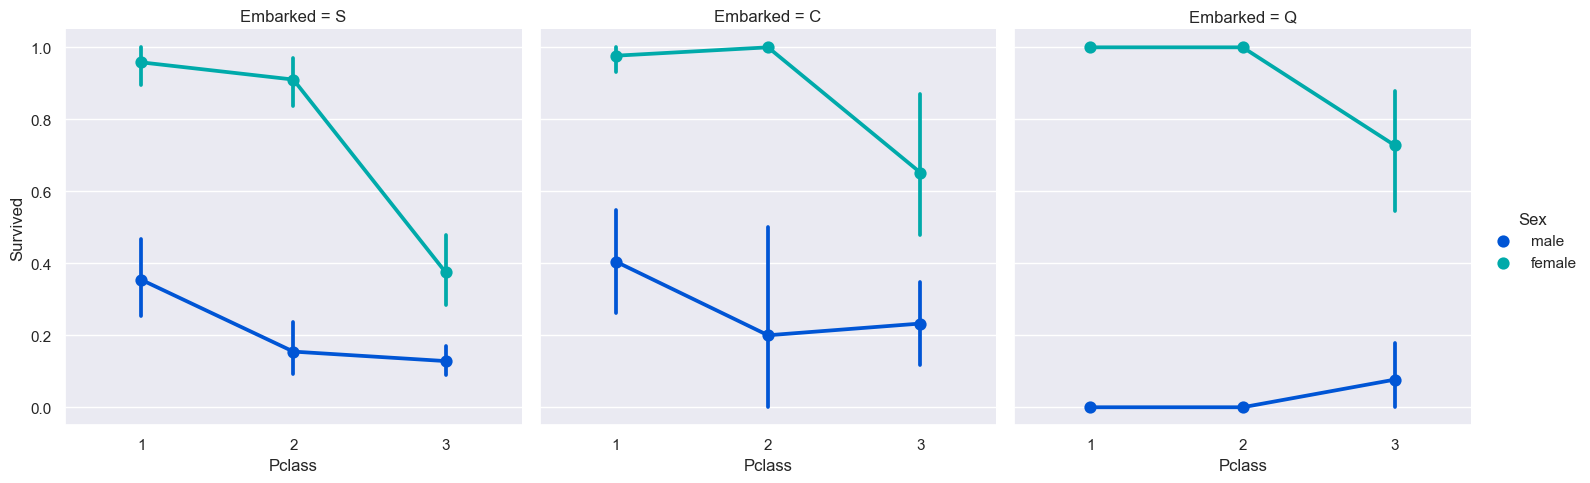

In [1984]:
sns.catplot(data=train_original, kind="point", x="Pclass", y="Survived", hue="Sex", col="Embarked", palette="winter")

In [1985]:
train_original.groupby('Embarked').Sex.value_counts()

Embarked  Sex   
C         male       95
          female     73
Q         male       41
          female     36
S         male      441
          female    203
Name: Sex, dtype: int64

In [1986]:
train_original.query('Embarked == "Q" and (Pclass == 1 or Pclass == 2) and Sex == "male"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.00,C78,Q
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.35,NaN,Q


In [1987]:
mf_train.query('Embarked__Q == 1 and Male == 0')

,Survived,Pclass,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Letter__C,Letter__D,Letter__E,Letter__F,Letter__G,Letter__None,Letter__T,Embarked__Q,Embarked__S,PassengerId
22,1.0,3.0,15.000000,0.0,0.0,8.0292,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,23
28,1.0,3.0,19.005000,0.0,0.0,7.8792,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,29
32,1.0,3.0,18.641000,0.0,0.0,7.7500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,33
44,1.0,3.0,19.000000,0.0,0.0,7.8792,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,45
47,1.0,3.0,17.244000,0.0,0.0,7.7500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,48
82,1.0,3.0,18.629000,0.0,0.0,7.7875,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,83
109,1.0,3.0,18.230000,1.0,0.0,24.1500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,110
156,1.0,3.0,16.000000,0.0,0.0,7.7333,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,157
186,1.0,3.0,32.463601,1.0,0.0,15.5000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,187
198,1.0,3.0,18.641000,0.0,0.0,7.7500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,199


NOTES: In part covered above in Embarked notes. We see that Cherbourg has the best male survival rates, and the best for female excepting Queenstown. Queenstown has the best female rates for every Pclass, Pclass 2 tied with Cherbourg's Pclass 2 at 100%. Queenstown Pclass 3 has many young women and is contrary to the general trend of younger women having a higher mortality. Southampton has the worst female survival rates for every class. Queenstown has the worst male survival rates, in Pclass 1 and 2 none survived but there existed only one passenger for each Pclass respectively.

## Age & Sex vs. Survival

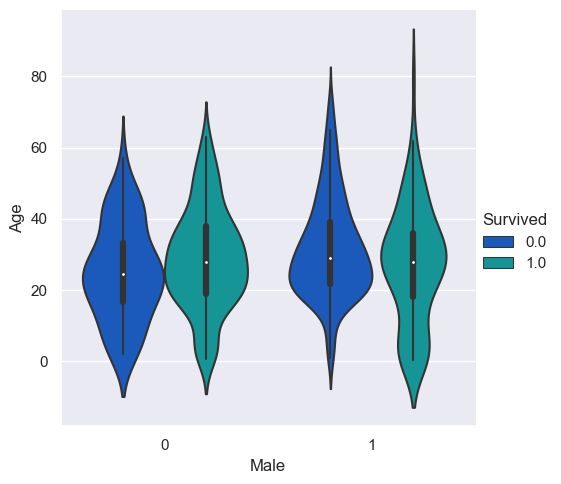

In [1988]:
sns.catplot(data=tt, kind="violin", x="Male", y="Age", hue="Survived", palette="winter")

NOTES: Comparing within Female, it appears Survival correlates a little with age as the Female Survived seems to be older than Female not Survived. Comparing within Male, many more boys survived than did not. Compare to girls who have a lower Survived. Between 16 and 30 many more men did not Survive than did, whereas with women above say 20 it's a fairly even split.

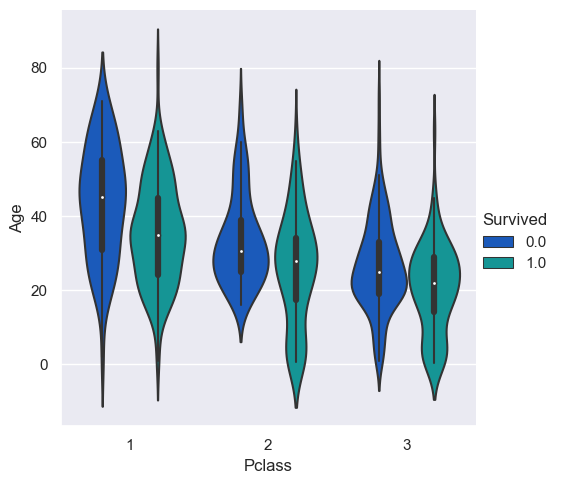

In [1989]:
sns.catplot(data=tt, kind="violin", x="Pclass", y="Age", hue="Survived", palette="winter")

NOTES: Pclass 1 covers the greatest range of Age, with those younger in Pclass 1 having greater chance of survival. Pclass 2 is noteable in that babies and toddlers all survived, and not Survived grew greater than Survived past Age 20. In Pclass 3, those under say 16 had greater chance of Survival but beyond that mortality was greater than survival.

# SURVIVED

In [1990]:
corr_matrix = mf_train.corr()
print(corr_matrix["Survived"].sort_values(ascending=False))

Survived          1.000000
Title_Mrs         0.344935
Title_Miss        0.332795
Fare              0.257307
Letter__B         0.175095
Letter__D         0.150716
Letter__E         0.145321
Dup_Ticket        0.121766
Letter__C         0.114652
Title_Master      0.085221
Parch             0.081629
Letter__F         0.057935
Title_Nobility    0.033391
Letter__G         0.016040
Embarked__Q       0.003650
Title_Officer     0.002496
PassengerId      -0.005007
Letter__T        -0.026456
SibSp            -0.035322
Ticket_Length    -0.055331
Title_Rev        -0.064988
Age              -0.087312
Embarked__S      -0.155660
Dup_Cabin        -0.218221
Letter__None     -0.316912
Pclass           -0.338481
Male             -0.543351
Title_Mr         -0.549199
Name: Survived, dtype: float64


# Feature extracation and modification

In [2318]:
mf_tt.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title__Master',
       'Title__Miss', 'Title__Mr', 'Title__Mrs', 'Title__Nobility',
       'Title__Officer', 'Title__Rev', 'Dup_Ticket', 'Ticket_Length',
       'Dup_Cabin', 'Male', 'Letter__B', 'Letter__C', 'Letter__D', 'Letter__E',
       'Letter__F', 'Letter__G', 'Letter__None', 'Letter__T', 'Embarked__Q',
       'Embarked__S'],
      dtype='object')

In [2458]:
mf_tt_2 = mf_tt[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 
                 #'Title__Master',
       #'Title__Miss', 'Title__Mr', 'Title__Mrs', 'Title__Nobility',
       #'Title__Officer', 'Title__Rev', 
                 'Dup_Ticket', 'Ticket_Length',
       'Dup_Cabin', 
                 #'Male', 
                 #'Letter__B', 'Letter__C', 'Letter__D', 'Letter__E',
       #'Letter__F', 'Letter__G', 'Letter__None', 'Letter__T', 'Embarked__Q',
       #'Embarked__S'
                ]].copy()

In [2460]:
mf_tt_2.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Dup_Ticket',
       'Ticket_Length', 'Dup_Cabin'],
      dtype='object')

In [2461]:
train2 = pd.read_csv("train.csv", index_col=False)
test2 = pd.read_csv("test.csv", index_col=False)
tt2 = pd.concat([train2, test2])

In [2462]:
tt2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2463]:
mf_tt_2.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Dup_Ticket',
       'Ticket_Length', 'Dup_Cabin'],
      dtype='object')

In [2464]:
mf_tt_2.insert(0, 'Title', list(tt2['Name']), allow_duplicates=True)

In [2465]:
mf_tt_2.insert(0, 'Cabin', list(tt2['Cabin']), allow_duplicates=True)
mf_tt_2.insert(0, 'Embarked', list(tt2['Embarked']), allow_duplicates=True)
mf_tt_2.insert(0, 'Sex', list(tt2['Sex']), allow_duplicates=True)

In [2466]:
mf_tt_2.head()

,Sex,Embarked,Cabin,Title,Survived,Pclass,Age,SibSp,Parch,Fare,Dup_Ticket,Ticket_Length,Dup_Cabin
0,male,S,NaN,"Braund, Mr. Owen Harris",0.0,3.0,22.0,1.0,0.0,7.2500,0.0,9.0,0.0
1,female,C,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,1.0,38.0,1.0,0.0,71.2833,0.0,8.0,0.0
2,female,S,NaN,"Heikkinen, Miss. Laina",1.0,3.0,26.0,0.0,0.0,7.9250,0.0,16.0,1.0
3,female,S,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,1.0,35.0,1.0,0.0,53.1000,0.0,6.0,0.0
4,male,S,NaN,"Allen, Mr. William Henry",0.0,3.0,35.0,0.0,0.0,8.0500,0.0,6.0,1.0


## Title

In [2467]:
mf_tt_2['Title']=mf_tt_2.Title.apply(lambda x: x.split('.')[0].split(',')[1].strip())

In [2468]:
newtitles = {
    "Capt":       "Other",
    "Col":        "Other",
    "Major":      "Other",
    "Jonkheer":   "Other",
    "Don":        "Other",
    "Sir" :       "Other",
    "Dr":         "Other",
    "Rev":        "Other",
    "the Countess":"Other",
    "Dona":       "Other",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr":        "Mr",
    "Mrs":       "Mrs",
    "Miss":      "Miss",
    "Master":    "Master",
    "Lady":      "Other"
}

In [2469]:
mf_tt_2['Title'] = mf_tt_2.Title.map(newtitles).copy()

In [2470]:
mf_tt_2.Title.value_counts()

Mr        757
Miss      262
Mrs       200
Master     61
Other      29
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='Survived'>

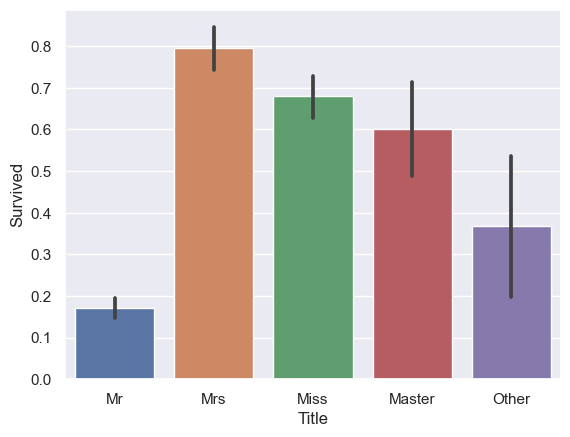

In [2471]:
sns.barplot(data=mf_tt_2, x='Title', y='Survived')

In [2472]:
ordinal_titles = {
    'Mr': 1,
    'Other': 2,
    'Master': 3,
    'Miss': 4,
    'Mrs': 5
}

In [2473]:
mf_tt_2['Title'] = mf_tt_2.Title.map(ordinal_titles).copy()

In [2474]:
mf_tt_2.corr(method='pearson')['Survived'].sort_values(ascending=True)

Pclass          -0.351113
Dup_Cabin       -0.202309
Age             -0.083557
Ticket_Length   -0.035893
SibSp           -0.021341
Parch            0.087856
Dup_Ticket       0.188111
Fare             0.272391
Title            0.591680
Survived         1.000000
Name: Survived, dtype: float64

## Sex

In [2475]:
onehot_sex = {
    'male': 1,
    'female': 0
}

In [2476]:
mf_tt_2['Sex'] = mf_tt_2.Sex.map(onehot_sex).copy()

In [2477]:
mf_tt_2.Sex

0       1
1       0
2       0
3       0
4       1
       ..
1304    1
1305    0
1306    1
1307    1
1308    1
Name: Sex, Length: 1309, dtype: int64

## Embarked

In [2478]:
mf_tt_2.Embarked

0       S
1       C
2       S
3       S
4       S
       ..
1304    S
1305    C
1306    S
1307    S
1308    C
Name: Embarked, Length: 1309, dtype: object

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

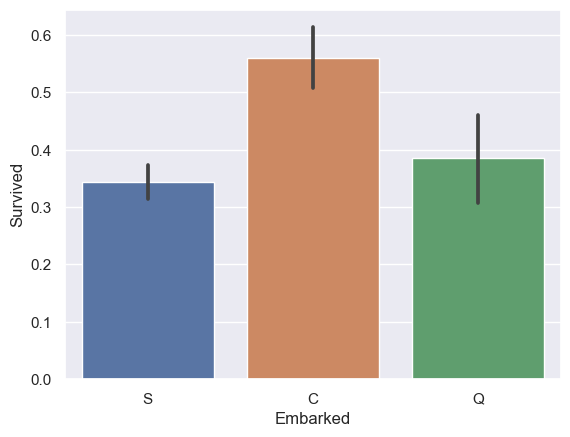

In [2479]:
sns.barplot(data=mf_tt_2, x='Embarked', y='Survived')

In [2480]:
new_embarked = {
    'S': 1,
    'Q': 2,
    'C': 3
}

In [2481]:
mf_tt_2['Embarked'] = mf_tt_2.Embarked.map(new_embarked).copy()

In [2482]:
mf_tt_2.Embarked

0       1.0
1       3.0
2       1.0
3       1.0
4       1.0
       ... 
1304    1.0
1305    3.0
1306    1.0
1307    1.0
1308    3.0
Name: Embarked, Length: 1309, dtype: float64

In [2483]:
mf_tt_2.corr(method='pearson')['Survived'].sort_values(ascending=True)

Sex             -0.560273
Pclass          -0.351113
Dup_Cabin       -0.202309
Age             -0.083557
Ticket_Length   -0.035893
SibSp           -0.021341
Parch            0.087856
Embarked         0.186931
Dup_Ticket       0.188111
Fare             0.272391
Title            0.591680
Survived         1.000000
Name: Survived, dtype: float64

## Age band

In [2484]:
mf_tt_2['Age_Band'] = pd.cut(mf_tt_2.Age, 5).copy()

In [2485]:
mf_tt_2.Age_Band.value_counts()

(16.136, 32.102]    673
(32.102, 48.068]    343
(0.0902, 16.136]    153
(48.068, 64.034]    127
(64.034, 80.0]       13
Name: Age_Band, dtype: int64

## Fare band

In [2486]:
mf_tt_2['Fare_Band'] = pd.qcut(mf_tt_2.Fare, 4).copy()

In [2487]:
mf_tt_2.Fare_Band.value_counts()

(-0.001, 7.896]      338
(14.454, 31.275]     328
(31.275, 512.329]    323
(7.896, 14.454]      320
Name: Fare_Band, dtype: int64

## Is alone?

In [2488]:
mf_tt_2['Family_Size'] = mf_tt_2.SibSp + mf_tt_2.Parch

In [2489]:
mf_tt_2['Is_Alone'] = np.where(mf_tt_2.Family_Size == 0, 1, 0)

In [2490]:
mf_tt_2.head()

,Sex,Embarked,Cabin,Title,Survived,Pclass,Age,SibSp,Parch,Fare,Dup_Ticket,Ticket_Length,Dup_Cabin,Age_Band,Fare_Band,Family_Size,Is_Alone
0,1,1.0,NaN,1,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,9.0,0.0,"(16.136, 32.102]","(-0.001, 7.896]",1.0,0
1,0,3.0,C85,5,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,8.0,0.0,"(32.102, 48.068]","(31.275, 512.329]",1.0,0
2,0,1.0,NaN,4,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,16.0,1.0,"(16.136, 32.102]","(7.896, 14.454]",0.0,1
3,0,1.0,C123,5,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,6.0,0.0,"(32.102, 48.068]","(31.275, 512.329]",1.0,0
4,1,1.0,NaN,1,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,6.0,1.0,"(32.102, 48.068]","(7.896, 14.454]",0.0,1


# Feature Selection

In [2491]:
mf_tt_2.corr(method='pearson')['Survived'].sort_values(ascending=True)

Sex             -0.560273
Pclass          -0.351113
Is_Alone        -0.228316
Dup_Cabin       -0.202309
Age             -0.083557
Ticket_Length   -0.035893
SibSp           -0.021341
Family_Size      0.033981
Parch            0.087856
Embarked         0.186931
Dup_Ticket       0.188111
Fare             0.272391
Title            0.591680
Survived         1.000000
Name: Survived, dtype: float64

Miss Forest already imputed survival for missing test values!?

In [2492]:
mf_tt_2.columns

Index(['Sex', 'Embarked', 'Cabin', 'Title', 'Survived', 'Pclass', 'Age',
       'SibSp', 'Parch', 'Fare', 'Dup_Ticket', 'Ticket_Length', 'Dup_Cabin',
       'Age_Band', 'Fare_Band', 'Family_Size', 'Is_Alone'],
      dtype='object')

In [2493]:
drop_features = ['SibSp', 'Parch', 'Ticket_Length', 'Family_Size']

In [2494]:
mf_tt_2 = mf_tt_2.drop(drop_features, axis=1).copy()

In [2495]:
mf_tt_2 = mf_tt_2.drop('Cabin', axis=1).copy()

In [2496]:
mf_tt_2.tail()

,Sex,Embarked,Title,Survived,Pclass,Age,Fare,Dup_Ticket,Dup_Cabin,Age_Band,Fare_Band,Is_Alone
1304,1,1.0,1,0.00,3.0,22.111657,8.0500,0.0,1.0,"(16.136, 32.102]","(7.896, 14.454]",1
1305,0,3.0,2,0.98,1.0,39.000000,108.9000,1.0,0.0,"(32.102, 48.068]","(31.275, 512.329]",1
1306,1,1.0,1,0.14,3.0,38.500000,7.2500,0.0,1.0,"(32.102, 48.068]","(-0.001, 7.896]",1
1307,1,1.0,1,0.00,3.0,30.055643,8.0500,0.0,1.0,"(16.136, 32.102]","(7.896, 14.454]",1
1308,1,3.0,3,0.84,3.0,6.202300,22.3583,1.0,1.0,"(0.0902, 16.136]","(14.454, 31.275]",0


In [2497]:
train_2 = mf_tt_2.iloc[0:891].copy()

In [2498]:
test_2 = mf_tt_2.iloc[891:1309].copy()

In [2499]:
test_2.head()

,Sex,Embarked,Title,Survived,Pclass,Age,Fare,Dup_Ticket,Dup_Cabin,Age_Band,Fare_Band,Is_Alone
891,1,2.0,1,0.11,3.0,34.5,7.8292,0.0,1.0,"(32.102, 48.068]","(-0.001, 7.896]",1
892,0,1.0,5,0.40,3.0,47.0,7.0000,0.0,1.0,"(32.102, 48.068]","(-0.001, 7.896]",0
893,1,2.0,1,0.14,2.0,62.0,9.6875,0.0,1.0,"(48.068, 64.034]","(7.896, 14.454]",1
894,1,1.0,1,0.64,3.0,27.0,8.6625,0.0,1.0,"(16.136, 32.102]","(7.896, 14.454]",1
895,0,1.0,5,0.61,3.0,22.0,12.2875,1.0,1.0,"(16.136, 32.102]","(7.896, 14.454]",0


# Ordinal encoding for Age and Fare

In [2502]:
mf_tt_2.head()

,Sex,Embarked,Title,Survived,Pclass,Age,Fare,Dup_Ticket,Dup_Cabin,Age_Band,Fare_Band,Is_Alone
0,1,1.0,1,0.0,3.0,22.0,7.2500,0.0,0.0,"(16.136, 32.102]","(-0.001, 7.896]",0
1,0,3.0,5,1.0,1.0,38.0,71.2833,0.0,0.0,"(32.102, 48.068]","(31.275, 512.329]",0
2,0,1.0,4,1.0,3.0,26.0,7.9250,0.0,1.0,"(16.136, 32.102]","(7.896, 14.454]",1
3,0,1.0,5,1.0,1.0,35.0,53.1000,0.0,0.0,"(32.102, 48.068]","(31.275, 512.329]",0
4,1,1.0,1,0.0,3.0,35.0,8.0500,0.0,1.0,"(32.102, 48.068]","(7.896, 14.454]",1


In [2503]:
mf_tt_2.loc[ mf_tt_2['Age'] <= 16.136, 'Age'] = 4
mf_tt_2.loc[(mf_tt_2['Age'] > 16.136) & (mf_tt_2['Age'] <= 32.102), 'Age'] = 1
mf_tt_2.loc[(mf_tt_2['Age'] > 32.102) & (mf_tt_2['Age'] <= 48.068), 'Age'] = 2
mf_tt_2.loc[(mf_tt_2['Age'] > 48.068) & (mf_tt_2['Age'] <= 64.034), 'Age'] = 3
mf_tt_2.loc[ mf_tt_2['Age'] > 64.034, 'Age'] = 0

In [2506]:
dataset = mf_tt_2

dataset.loc[ dataset['Fare'] <= 7.896, 'Fare'] = 0
dataset.loc[(dataset['Fare'] > 7.896) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.275), 'Fare']   = 2
dataset.loc[ dataset['Fare'] > 31.275, 'Fare'] = 3
dataset['Fare'] = dataset['Fare'].astype(int)

In [2509]:
mf_tt_2 = mf_tt_2.drop(['Age_Band', 'Fare_Band'], axis=1).copy()

In [2510]:
train_2 = mf_tt_2.iloc[0:891].copy()

In [2511]:
test_2 = mf_tt_2.iloc[891:1309].copy()

In [2514]:
test_2 = test_2.drop('Survived', axis=1)

# Building model

In [2604]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

In [2605]:
y = train_2.Survived.copy()
X = train_2.drop('Survived', axis=1).copy()

In [2606]:
y = y.astype('int64').copy()

In [2607]:
X.Embarked = X.Embarked.fillna(1).copy()

In [2608]:
X = X.astype('int64').copy()

In [2609]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502,
                                                    stratify = y)

In [2610]:
model = RandomForestClassifier(n_estimators = 131,
                               random_state = 1502)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=131, random_state=1502)

In [2611]:
predictions = model.predict(X_test)
predictions[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [2612]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       110
           1       0.85      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [2613]:
f1_score(y_test, predictions)

0.7812499999999999

In [2614]:
importance = pd.Series(model.feature_importances_,
                       index = X_train.columns.values)

importance.sort_values(ascending=False)

Title         0.283145
Sex           0.168197
Pclass        0.152125
Age           0.104522
Fare          0.103347
Embarked      0.075280
Dup_Cabin     0.040181
Dup_Ticket    0.037648
Is_Alone      0.035554
dtype: float64

In [2569]:
from sklearn.model_selection import ParameterGrid

In [2570]:
param_grid = {'n_estimators': range(130,140,1)}
grid = ParameterGrid(param_grid)
grid

In [2571]:
#Storing results
f1score = []
number = []
i = 0
for p in grid:
  model = RandomForestClassifier(n_estimators = p['n_estimators'],
                                 random_state = 1502)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  f1 = f1_score(y_test, predictions)
  f1score.append(f1)
  number.append(grid[i])
  i += 1

In [2572]:
results = pd.DataFrame((zip(number,f1score)),columns=['n_estimators', 'f1score'])
results.sort_values('f1score', ascending=False)

,n_estimators,f1score
1,{'n_estimators': 131},0.781250
2,{'n_estimators': 132},0.781250
3,{'n_estimators': 133},0.781250
4,{'n_estimators': 134},0.781250
0,{'n_estimators': 130},0.771654
5,{'n_estimators': 135},0.771654
6,{'n_estimators': 136},0.771654
7,{'n_estimators': 137},0.771654
8,{'n_estimators': 138},0.771654
9,{'n_estimators': 139},0.771654


# Submission file

In [2618]:
test_2 = test_2.drop(['index', 'Survived', 'PassengerId'], axis=1)

In [2619]:
test_2_X = test_2.copy()

In [2621]:
predicted = model.predict(test_2_X)

In [2622]:
test_2['Survived'] = predicted

In [2623]:
test_2 = test_2.reset_index().copy()

In [2624]:
test_2

,index,Sex,Embarked,Title,Pclass,Age,Fare,Dup_Ticket,Dup_Cabin,Is_Alone,Survived
0,0,1,2.0,1,3.0,2.0,0,0.0,1.0,1,0
1,1,0,1.0,5,3.0,2.0,0,0.0,1.0,0,0
2,2,1,2.0,1,2.0,3.0,1,0.0,1.0,1,0
3,3,1,1.0,1,3.0,1.0,1,0.0,1.0,1,0
4,4,0,1.0,5,3.0,1.0,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
413,413,1,1.0,1,3.0,1.0,1,0.0,1.0,1,0
414,414,0,3.0,2,1.0,2.0,3,1.0,0.0,1,1
415,415,1,1.0,1,3.0,2.0,0,0.0,1.0,1,0
416,416,1,1.0,1,3.0,1.0,1,0.0,1.0,1,0


In [2625]:
test_2['PassengerId'] = test['PassengerId']

In [2626]:
test_2['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [2627]:
submission = test_2[['PassengerId', 'Survived']].copy()

In [2628]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [2629]:
submission.to_csv('submission.csv', index=False)